# Exploratory Data Analysis [Mock]

This is a mock analysis of the ASUU Strike Project. This is to help us figure out what to do with the data and optimise the process.

### Import packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

### Load data into dataframe

In [3]:
raw_df = pd.read_csv("raw_sample.csv")

raw_df.head()

,Timestamp,Are you a student of UNILAG?,Current level of study \n,How old are you?,What is your gender?,Marital Status,What's your faculty?,What is your department?,How has the just concluded strike affected you ?,Did you acquire any skill relevant to your course of study?,...,How would you rate your preparation for the exams ? [After Strike],How would you rate the quality of your lectures? [Before Strike],How would you rate the quality of your lectures? [After Strike],How confident are you in the significance of your academics [Before Strike],How confident are you in the significance of your academics [After Strike],What was your CGPA before the strike?,What is your current CGPA?\nDon't be shy,Were you employed during the strike?,Did you quit the job when the strike was called-off,"Would you like to be contacted for follow-up questions? If so, kindly drop your email.\nOnly drop your email if you're comfortable doing so!"
0,2/9/2023 10:18:58,Yes,400level,22–24,Female,Single,Management Science,Finance,1. It has increased the amount of years I’m to...,Yes,...,Poor,Neutral,Poor,Good,Neutral,4.30,4.09,Yes,No,NaN
1,2/9/2023 10:39:25,Yes,300level,19–21,Male,Single,Science,Statistics,Positively,Yes,...,Good,Good,Good,Good,Good,4.51,4.51,Yes,No,NaN
2,2/9/2023 10:59:26,Yes,300level,25–27,Male,Single,Science,Botany,It has affected my reading culture and habits,Yes,...,Neutral,Neutral,Poor,Good,Neutral,4.09,4.08,No,No,NaN
3,2/9/2023 23:01:53,Yes,400level,22–24,Male,Single,Science,Geophysics,NIL,No,...,Neutral,Neutral,Poor,Neutral,Poor,3.88,3.56,No,No,NaN
4,2/9/2023 23:03:22,Yes,200level,16–18,Female,Married,Engineering,Civil Engineering,Made me a millionaire,No,...,Neutral,Neutral,Neutral,Neutral,Neutral,2.96,2.02,Yes,No,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                       --------------  -----  
 0   Timestamp                                                                                                                                    18 non-null     object 
 1   Are you a student of UNILAG?                                                                                                                 18 non-null     object 
 2   Current level of study 
                                                                                                                     18 non-null     object 
 3   How old are you?                          

## Clean data

Drop all non-UNILAG students

In [5]:
sample_df = raw_df[raw_df["Are you a student of UNILAG?"] == "Yes"]

Drop unrequired columns

In [6]:
cols_to_drop = ["Timestamp", 
                "Are you a student of UNILAG?",
                "How has the just concluded strike affected you ?",
                "What challenges did you experience during resumption after the long strike?",
                "Would you like to be contacted for follow-up questions? If so, kindly drop your email.\nOnly drop your email if you're comfortable doing so!",
                ]
sample_df.drop(columns=cols_to_drop, axis=1, inplace=True)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 17
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Current level of study 
                                                     16 non-null     object 
 1   How old are you?                                                             16 non-null     object 
 2   What is your gender?                                                         16 non-null     object 
 3   Marital  Status                                                              16 non-null     object 
 4   What's your faculty?                                                         16 non-null     object 
 5   What is your department?                                                     16 non-null     object 
 6   Did you acquire any skill relevant to your c

C:\Users\User\AppData\Local\Temp\ipykernel_32740\1047977438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df.drop(columns=cols_to_drop, axis=1, inplace=True)


Rename columns

In [7]:
new_col_names = [
    "level", "age", "gender", "marital_status", "faculty", "department", "skill", "prep_before", "prep_after", 
    "quality_before", "quality_after", "confidence_before", "confidence_after", 
    "cgpa_before", "cgpa_after", "employment", "quit_job"
]

sample_df.columns = new_col_names

sample_df.head()

,level,age,gender,marital_status,faculty,department,skill,prep_before,prep_after,quality_before,quality_after,confidence_before,confidence_after,cgpa_before,cgpa_after,employment,quit_job
0,400level,22–24,Female,Single,Management Science,Finance,Yes,Neutral,Poor,Neutral,Poor,Good,Neutral,4.30,4.09,Yes,No
1,300level,19–21,Male,Single,Science,Statistics,Yes,Good,Good,Good,Good,Good,Good,4.51,4.51,Yes,No
2,300level,25–27,Male,Single,Science,Botany,Yes,Good,Neutral,Neutral,Poor,Good,Neutral,4.09,4.08,No,No
3,400level,22–24,Male,Single,Science,Geophysics,No,Poor,Neutral,Neutral,Poor,Neutral,Poor,3.88,3.56,No,No
4,200level,16–18,Female,Married,Engineering,Civil Engineering,No,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,2.96,2.02,Yes,No


**Remove Outliers**

Ouliers include all 100 Level students, as they have nothing to compare against. Some students might have entered wrong values for CGPA. Take note of that as well.

In [8]:
# remove 100 level students
sample_df = sample_df[sample_df["level"]!="100level"]

# remove outliers (CGPA = 0)
sample_df = sample_df[
    (sample_df["cgpa_before"]>0) & (sample_df["cgpa_after"]>0)
    ]
sample_df.describe()

,cgpa_before,cgpa_after
count,14.000000,14.000000
mean,3.882857,3.672143
std,0.700170,0.792728
min,2.330000,2.020000
25%,3.410000,3.410000
50%,4.065000,3.800000
75%,4.435000,4.087500
max,4.710000,4.790000


Expand Dataframe to Simulate Target Reach **[Test Only]**

In [9]:
# expand dataframe to simulate 2000 respondents
exp_sample = pd.concat([sample_df]*200, ignore_index=True)


# Predict random CGPA values for richer data
# Subtracted 0.5 from std to ensure no values above 5.0 in CGPA

std_before = exp_sample.cgpa_before.std() - 0.4 
std_after = exp_sample.cgpa_after.std() - 0.4
mean_before = exp_sample.cgpa_before.mean()
mean_after = exp_sample.cgpa_after.mean()

np.random.seed(21)

exp_sample["cgpa_before"] = np.random.normal(mean_before, std_before, size=len(exp_sample))
exp_sample["cgpa_after"] = np.random.normal(mean_after, std_after, size=len(exp_sample))

Compute target variable

In [10]:
exp_sample["cgpa_change"] = exp_sample["cgpa_after"] - exp_sample["cgpa_before"]
exp_sample.describe()

,cgpa_before,cgpa_after,cgpa_change
count,2800.000000,2800.000000,2800.000000
mean,3.883227,3.685003,-0.198224
std,0.273508,0.367070,0.449479
min,2.824122,2.327421,-1.866569
25%,3.695982,3.430786,-0.520817
50%,3.885249,3.678242,-0.200523
75%,4.061676,3.926846,0.106738
max,4.951889,4.955644,1.361643


How does the data look?

In [11]:
exp_sample.head()

,level,age,gender,marital_status,faculty,department,skill,prep_before,prep_after,quality_before,quality_after,confidence_before,confidence_after,cgpa_before,cgpa_after,employment,quit_job,cgpa_change
0,400level,22–24,Female,Single,Management Science,Finance,Yes,Neutral,Poor,Neutral,Poor,Good,Neutral,3.868576,3.521037,Yes,No,-0.347539
1,300level,19–21,Male,Single,Science,Statistics,Yes,Good,Good,Good,Good,Good,Good,3.852298,4.567279,Yes,No,0.714981
2,300level,25–27,Male,Single,Science,Botany,Yes,Good,Neutral,Neutral,Poor,Good,Neutral,4.169165,4.050938,No,No,-0.118227
3,400level,22–24,Male,Single,Science,Geophysics,No,Poor,Neutral,Neutral,Poor,Neutral,Poor,3.537479,3.684619,No,No,0.147139
4,200level,16–18,Female,Married,Engineering,Civil Engineering,No,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,4.087705,3.683059,Yes,No,-0.404646


Save Cleaned Sample

In [12]:
exp_sample.to_csv("expanded_sample.csv", index=False)

## Analysis

In [13]:
sns.set_theme(style='whitegrid')

How did CGPA distribution change before and after the strike?

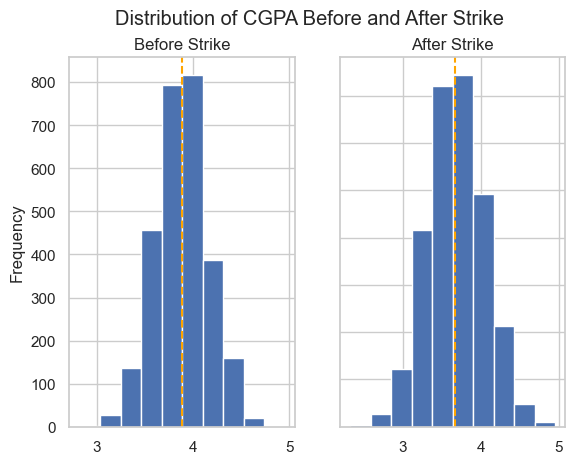

In [14]:
fig, ax = plt.subplots(1, 2)
exp_sample.cgpa_before.plot(kind="hist", ax=ax[0], title="Before Strike")
ax[0].axvline(mean_before, color="orange", linestyle="--")

exp_sample.cgpa_after.plot(kind="hist", ax=ax[1], title="After Strike", sharey=True)
ax[1].axvline(mean_after, color="orange", linestyle="--")

plt.suptitle("Distribution of CGPA Before and After Strike");

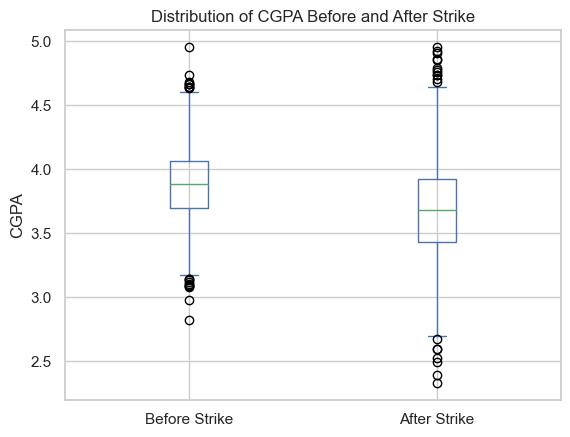

In [15]:
exp_sample.plot(kind="box", y=["cgpa_before", "cgpa_after"])
plt.ylabel("CGPA")
plt.xticks(ticks=[1, 2], labels=["Before Strike", "After Strike"], rotation=0);
plt.title("Distribution of CGPA Before and After Strike");

In [16]:
# plt.plot(exp_sample["cgpa_change"])

How does this change for male and female students?

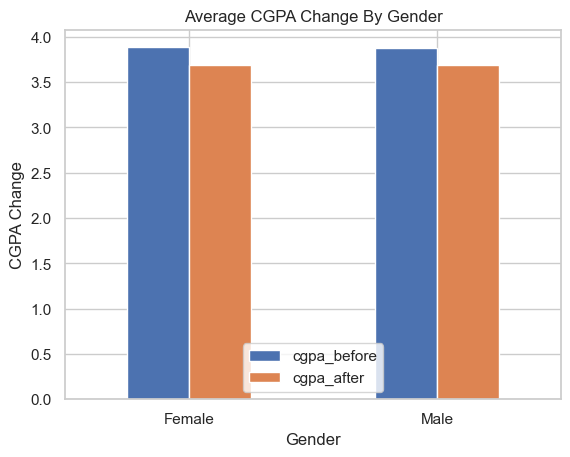

In [17]:
exp_sample.groupby("gender").mean().plot(kind="bar", y=["cgpa_before", "cgpa_after"])
plt.title("Average CGPA Change By Gender")
plt.xlabel("Gender")
plt.ylabel("CGPA Change")
plt.legend(loc="lower center")
plt.xticks(rotation=0);

Did employed students struggle more?

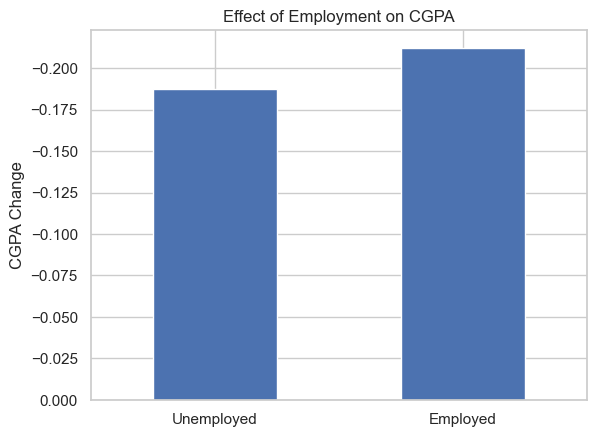

In [18]:
fig, ax = plt.subplots()
ax.invert_yaxis()
exp_sample.groupby("employment").mean().cgpa_change.plot(kind="bar")
plt.title("Effect of Employment on CGPA")
plt.xlabel("")
plt.ylabel("CGPA Change")
plt.xticks(ticks=[0, 1], labels=["Unemployed", "Employed"], rotation=0);

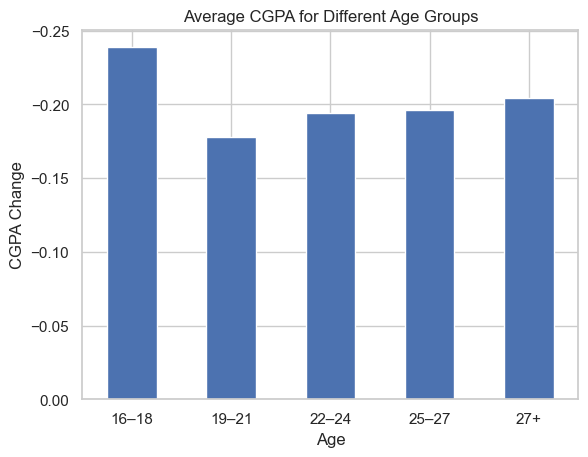

In [19]:
fig, ax = plt.subplots()
exp_sample.groupby("age").mean().cgpa_change.plot(kind="bar")
plt.title("Average CGPA for Different Age Groups")
plt.xlabel("Age")
plt.ylabel("CGPA Change")
ax.invert_yaxis()
plt.xticks(rotation=0);

How did performance vary by category? 

In [20]:
def categorize_change(val):
    category = ""

    if abs(val) >= 1:
        category+="EXTREME"
    elif abs(val) >= 0.5:
        category+="VERY HIGH"
    elif abs(val) >= 0.2:
        category+="HIGH"
    elif abs(val) >= 0.1:
        category+="MEDIUM"
    elif abs(val) >= 0.05:
        category+="LOW"
    else:
        category+=" VERY LOW"
        
    if val > 0:
        category+= "-RISE"
    else:
        category+= "-DROP"
    
    return category

In [21]:
long_cat_df = exp_sample.drop(columns=["cgpa_before", "cgpa_after"])

long_cat_df["cgpa_change"] = long_cat_df["cgpa_change"].apply(categorize_change)
long_cat_df.head()

,level,age,gender,marital_status,faculty,department,skill,prep_before,prep_after,quality_before,quality_after,confidence_before,confidence_after,employment,quit_job,cgpa_change
0,400level,22–24,Female,Single,Management Science,Finance,Yes,Neutral,Poor,Neutral,Poor,Good,Neutral,Yes,No,HIGH-DROP
1,300level,19–21,Male,Single,Science,Statistics,Yes,Good,Good,Good,Good,Good,Good,Yes,No,VERY HIGH-RISE
2,300level,25–27,Male,Single,Science,Botany,Yes,Good,Neutral,Neutral,Poor,Good,Neutral,No,No,MEDIUM-DROP
3,400level,22–24,Male,Single,Science,Geophysics,No,Poor,Neutral,Neutral,Poor,Neutral,Poor,No,No,MEDIUM-RISE
4,200level,16–18,Female,Married,Engineering,Civil Engineering,No,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Yes,No,HIGH-DROP


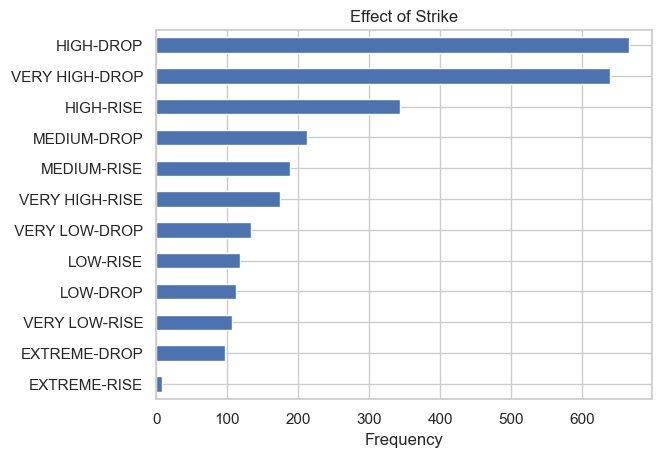

In [22]:
long_cat_df["cgpa_change"].value_counts().sort_values().plot(kind="barh")
plt.title("Effect of Strike")
plt.xlabel("Frequency");

Did most people drop or rise?

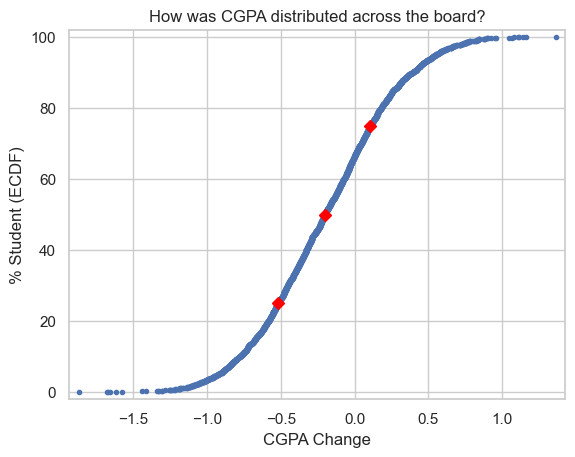

In [23]:
x = np.sort(exp_sample["cgpa_change"])
y = 100 * np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')

percentiles = np.array([25, 50, 75])
percentile_values = np.percentile(exp_sample["cgpa_change"], percentiles)


plt.plot(percentile_values, percentiles, marker='D', color='red',
         linestyle='none')
plt.xlabel('CGPA Change')
plt.ylabel('% Student (ECDF)')
plt.title("How was CGPA distributed across the board?")
plt.margins(0.02); # Keeps data off plot edge

In [24]:
def rise_or_drop(val):  
        
    if val > 0:
        category= 0 # CGPA rose
    else:
        category= 1 # CGPA dropped
    
    return category

In [25]:
cat_df = exp_sample.drop(columns=["cgpa_before", "cgpa_after"])
cat_df["cgpa_drop"] = cat_df["cgpa_change"].apply(rise_or_drop)
cat_df.drop(columns="cgpa_change", inplace=True)
cat_df.head()

,level,age,gender,marital_status,faculty,department,skill,prep_before,prep_after,quality_before,quality_after,confidence_before,confidence_after,employment,quit_job,cgpa_drop
0,400level,22–24,Female,Single,Management Science,Finance,Yes,Neutral,Poor,Neutral,Poor,Good,Neutral,Yes,No,1
1,300level,19–21,Male,Single,Science,Statistics,Yes,Good,Good,Good,Good,Good,Good,Yes,No,0
2,300level,25–27,Male,Single,Science,Botany,Yes,Good,Neutral,Neutral,Poor,Good,Neutral,No,No,1
3,400level,22–24,Male,Single,Science,Geophysics,No,Poor,Neutral,Neutral,Poor,Neutral,Poor,No,No,0
4,200level,16–18,Female,Married,Engineering,Civil Engineering,No,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Yes,No,1


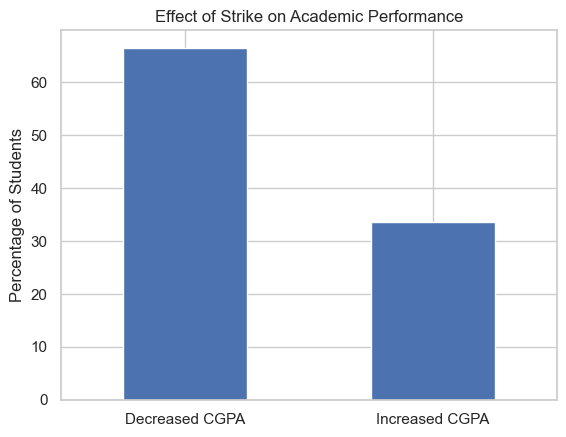

In [27]:
(cat_df.value_counts("cgpa_drop", normalize=True)*100).plot(kind="bar")
plt.title("Effect of Strike on Academic Performance")
plt.ylabel("Percentage of Students")
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=["Decreased CGPA", "Increased CGPA"], rotation=0);

## Statistical Testing

### Strike Effect

**Null Hypothesis**: There is no real change in the average CGPA before and after strike. Any observed change is due to chance, not the Strike.

**Alternative Hypothesis**: There is a significant difference in the average CGPA before and after the strike.

**Significance Level**: 0.01 (1%)

**Criteria**: The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic under the null hypothesis. If the p-value is smaller than the significance level, reject the null hypothesis in favor of the alternative hypothesis. If the p-value is larger than the significance level, fail to reject the null hypothesis.

In [28]:
def conduct_t_test(data1, data2,  alpha=0.01):
    # conduct a two-sided t-test to compare means
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)

    # print the results
    print("t-statistic: ", t_stat)
    print("p-value: ", p_val)

    # interpret the results
    if p_val < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

In [29]:
conduct_t_test(exp_sample["cgpa_before"], exp_sample["cgpa_after"])

t-statistic:  22.913693371577043
p-value:  9.370894740453798e-111
Reject the null hypothesis.


### Gender Effect

**Null Hypothesis**: Gender has no effect on CGPA change. Any diferences observed in CGPA change may be due to chance.

**Alternative Hypothesis**: Gender affected CGPA.

**Significance Level**: 0.05 (5%)

In [30]:
female_cgpa_change = exp_sample[exp_sample["gender"] == "Female"]["cgpa_change"]
male_cgpa_change = exp_sample[exp_sample["gender"]=="Male"]["cgpa_change"]
conduct_t_test(female_cgpa_change, male_cgpa_change, alpha=0.05)

t-statistic:  -0.2063505323630004
p-value:  0.836532942992729
Fail to reject the null hypothesis.


### Employment Effect
**Null Hypothesis**: Employment has no effect on CGPA change. Any diferences observed in CGPA change may be due to chance.

**Alternative Hypothesis**: Employment affected CGPA change.

**Significance Level**: 0.05 (5%)

In [31]:
female_cgpa_change = exp_sample[exp_sample["employment"] == "Yes"]["cgpa_change"]
male_cgpa_change = exp_sample[exp_sample["employment"] == "No"]["cgpa_change"]
conduct_t_test(female_cgpa_change, male_cgpa_change, alpha=0.05)

t-statistic:  -1.4262009318112177
p-value:  0.15393566879939874
Fail to reject the null hypothesis.


### Age Effect
**Null Hypothesis**: Age has no effect on CGPA change. There is no significant difference in the mean CGPA change among the age groups.

**Alternative Hypothesis**: There is a significant difference in the mean CGPA change among the age groups.

In [32]:
# Define the age groups
age_cgpa_change = {
    '16-18': exp_sample[exp_sample["age"] == '16-18']["cgpa_change"],
    '19-21': exp_sample[exp_sample["age"] == '19-21']["cgpa_change"],
    '22-24': exp_sample[exp_sample["age"] == '22-24']["cgpa_change"],
    '25-27': exp_sample[exp_sample["age"] == '25-27']["cgpa_change"],
    '27+': exp_sample[exp_sample["age"] == '27+']["cgpa_change"]
    }

# Perform the ANOVA test
f_value, p_value = f_oneway(*age_cgpa_change.values())

# Print the results
print('F-value:', f_value)
print('p-value:', p_value)


F-value: nan
p-value: nan


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


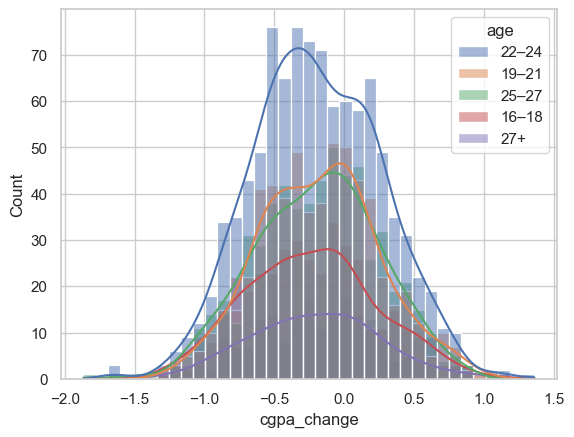

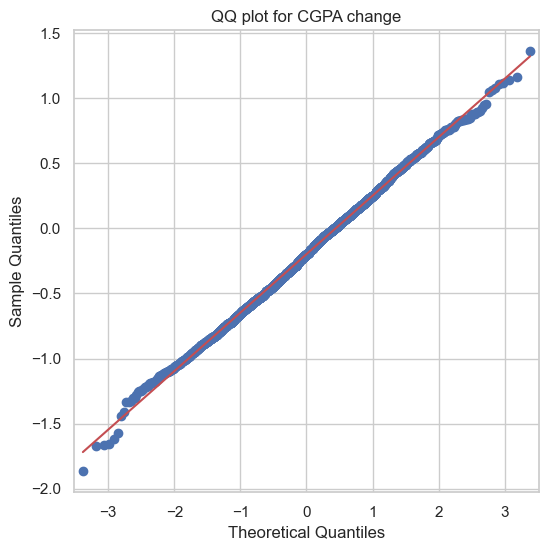

In [33]:
# Plot a histogram and a Q-Q plot of the data
import statsmodels.api as sm
sns.histplot(data=exp_sample, x="cgpa_change", hue="age", kde=True)

# Generate the QQ plot for cgpa_change
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(exp_sample["cgpa_change"], line="s", ax=ax)
ax.set_title("QQ plot for CGPA change")
plt.show()

In [34]:
from scipy.stats import shapiro, levene



# Perform the Shapiro-Wilk test for normality
stat, p = shapiro(exp_sample["cgpa_change"])
print("Shapiro-Wilk test for normality:")
print(f"Statistics={stat:.3f}, p-value={p:.3f}")
if p > 0.05:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Shapiro-Wilk test for normality:
Statistics=0.999, p-value=0.053
Sample looks Gaussian (fail to reject H0)


In [35]:
# Perform Levene's test for homogeneity of variances
stat, p = levene(*age_cgpa_change.values())
print("Levene's test for homogeneity of variances:")
print(f"Statistics={stat:.3f}, p-value={p:.3f}")
if p > 0.05:
    print("Variances are homogeneous (fail to reject H0)")
else:
    print("Variances are not homogeneous (reject H0)")


Levene's test for homogeneity of variances:
Statistics=nan, p-value=nan
Variances are not homogeneous (reject H0)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
exp_sample.isna().sum()

level                  0
age                    0
gender                 0
marital_status         0
faculty                0
department             0
skill                  0
prep_before            0
prep_after             0
quality_before         0
quality_after          0
confidence_before      0
confidence_after       0
cgpa_before            0
cgpa_after             0
employment             0
quit_job             400
cgpa_change            0
dtype: int64

In [37]:
import scipy.stats as stats

# Create a dictionary of the different age groups and their respective cgpa_change values
age_cgpa_change = {
    '16-18': exp_sample[exp_sample["age"] == '16-18']["cgpa_change"],
    '19-21': exp_sample[exp_sample["age"] == '19-21']["cgpa_change"],
    '22-24': exp_sample[exp_sample["age"] == '22-24']["cgpa_change"],
    '25-27': exp_sample[exp_sample["age"] == '25-27']["cgpa_change"],
    '27+': exp_sample[exp_sample["age"] == '27+']["cgpa_change"]
}

# Perform the Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*age_cgpa_change.values())

# Print the results
print('H-statistic:', h_statistic)
print('p-value:', p_value)


H-statistic: nan
p-value: nan
